## Preprocessing

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')
#  Import and read the charity_data.csv.

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [3]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cols = ['EIN', 'NAME']
application_df = application_df.drop(cols, axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [6]:
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL']

for col in cols:
    print(col)
    print(application_df[col].value_counts())
    print()

APPLICATION_TYPE
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

AFFILIATION
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

CLASSIFICATION
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

USE_CASE
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

ORGANIZATION
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Nam

In [7]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [8]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df.APPLICATION_TYPE.value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [9]:
# Application values greater than 200
application_types_to_replace = application_df.APPLICATION_TYPE.value_counts().loc[lambda x : x<200]
application_types_to_replace.index

Index(['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17'], dtype='object', name='APPLICATION_TYPE')

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [11]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df.CLASSIFICATION.value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df.CLASSIFICATION.value_counts().loc[lambda x : x>1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [13]:
# Greater than 100
classifications_to_replace = application_df.CLASSIFICATION.value_counts().loc[lambda x : x<500]
classifications_to_replace.index



Index(['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300',
       'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120',
       'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235',
       'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260',
       'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190',
       'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900',
       'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283',
       'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500',
       'C2150'],
      dtype='object', name='CLASSIFICATION')

In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300',
       'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120',
       'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235',
       'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260',
       'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190',
       'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900',
       'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283',
       'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500',
       'C2150']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1484
C7000,777


In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df2 = pd.get_dummies(application_df, dtype=int)
application_df2.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [16]:
application_df2.STATUS.value_counts()

,count
STATUS,
1,34294
0,5


In [17]:
# Split our preprocessed data into our features and target arrays
X = application_df2.drop(columns='IS_SUCCESSFUL')
y = application_df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(25724, 44) (8575, 44)


In [18]:
X.columns

Index(['STATUS', 'ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AM

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247 (988.00 B)

 Trainable params: 247 (988.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5314 - loss: 110447.0000
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5297 - loss: 16926.2383
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5357 - loss: 5753.0898
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4700 - loss: 1.1386
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4681 - loss: 0.9028
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4677 - loss: 0.7672
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4641 - loss: 0.7111
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4833 - loss: 0.6941
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5313 - loss: 0.6914
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5336 - loss: 0.6909
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5289 - loss: 0.6915
Epoch 12/100
804/804 ━━━━━━━━

In [23]:
# Export our model to HDF5 file
nn.save("model_1.h5")

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.5303 - loss: 0.7177
Loss: 0.7176789045333862, Accuracy: 0.5302624106407166


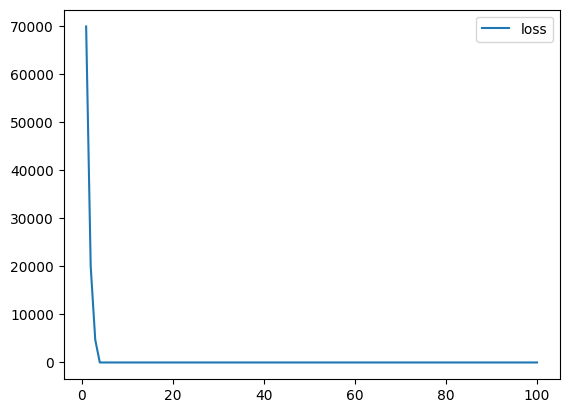

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

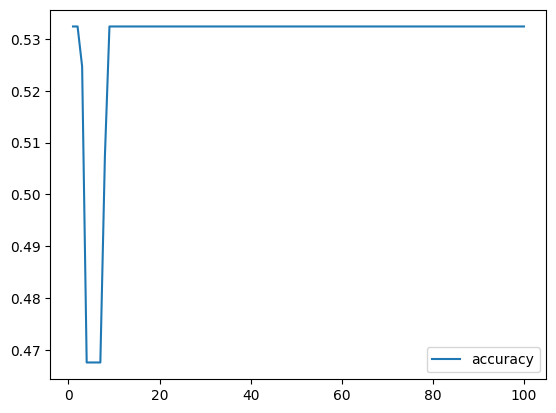

In [26]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [28]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27      0.50      0.35      8575
wei

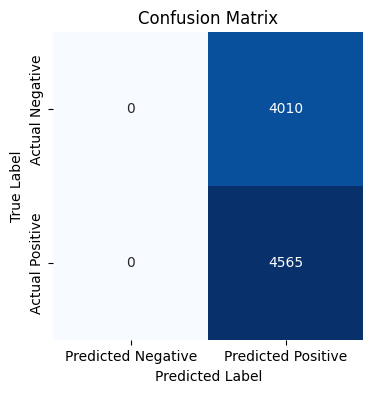

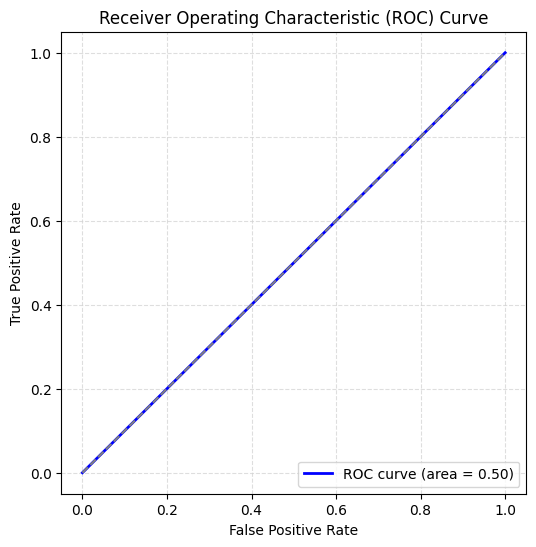

In [29]:
doClassification_NN(nn, X_train, X_test, y_train, y_test)

In [30]:
# Split our preprocessed data into our features and target arrays
X = application_df2.drop(columns=['IS_SUCCESSFUL', 'STATUS'])
y = application_df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(25724, 43) (8575, 43)


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [32]:
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=2, activation="tanh"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 5)                   │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249 (996.00 B)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model2 = nn2.fit(X_train, y_train, epochs=300)

Epoch 1/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5309 - loss: 0.6914
Epoch 2/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5321 - loss: 0.6911
Epoch 3/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5349 - loss: 0.6908
Epoch 4/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5291 - loss: 0.6915
Epoch 5/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5301 - loss: 0.6914
Epoch 6/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5286 - loss: 0.6917
Epoch 7/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5276 - loss: 0.6917
Epoch 8/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 0.6913
Epoch 9/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5251 - loss: 0.6919
Epoch 10/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5307 - loss: 0.6913
Epoch 11/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5272 - loss: 0.6918
Epoch 12/300
804/804 ━━━━━━━━━━━━━━━━━━━━

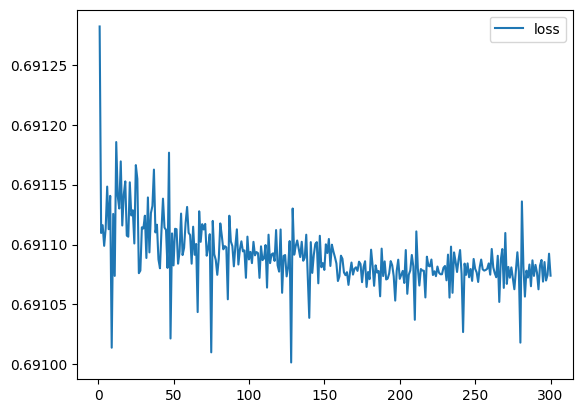

In [35]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Loss: 0.6910538673400879, Accuracy: 0.5323615074157715


In [37]:
nn2.save("model_2.h5")

In [38]:
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=12, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 15)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 979 (3.82 KB)

 Trainable params: 979 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_model3 = nn3.fit(X_train, y_train, epochs=175)

Epoch 1/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5294 - loss: 0.6921
Epoch 2/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5337 - loss: 0.6909
Epoch 3/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5296 - loss: 0.6915
Epoch 4/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5395 - loss: 0.6903
Epoch 5/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5267 - loss: 0.6919
Epoch 6/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5325 - loss: 0.6913
Epoch 7/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5348 - loss: 0.6911
Epoch 8/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5341 - loss: 0.6912
Epoch 9/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5326 - loss: 0.6912
Epoch 10/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5336 - loss: 0.6911
Epoch 11/175
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5279 - loss: 0.6918
Epoch 12/175
804/804 ━━━━━━━━━━━━━━━━━━━━

In [41]:
# Export our model to HDF5 file
nn3.save("model_3.h5")

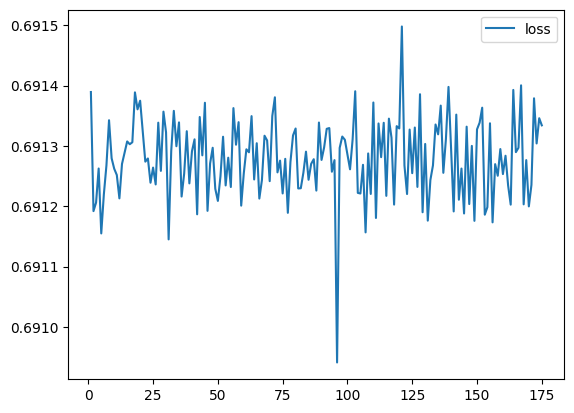

In [42]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model3.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.6042 - loss: 0.6820
Loss: 0.6820183396339417, Accuracy: 0.6041982769966125


In [44]:
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=12, activation="tanh", input_dim=len(X.columns)))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 12)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 655 (2.56 KB)

 Trainable params: 655 (2.56 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Train the model
fit_model4 = nn4.fit(X_train, y_train, epochs=200)

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5338 - loss: 0.6934
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5345 - loss: 0.6914
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5319 - loss: 0.6915
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5383 - loss: 0.6907
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5283 - loss: 0.6918
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5321 - loss: 0.6914
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5323 - loss: 0.6915
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5322 - loss: 0.6913
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5281 - loss: 0.6920
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5305 - loss: 0.6917
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5282 - loss: 0.6919
Epoch 12/200
804/804 ━━━━━━━━━━━━━━━━━━━━

In [48]:
# Export our model to HDF5 file
nn4.save("model_4.h5")

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.4012 - loss: 0.7530
Loss: 0.7530439496040344, Accuracy: 0.401166170835495


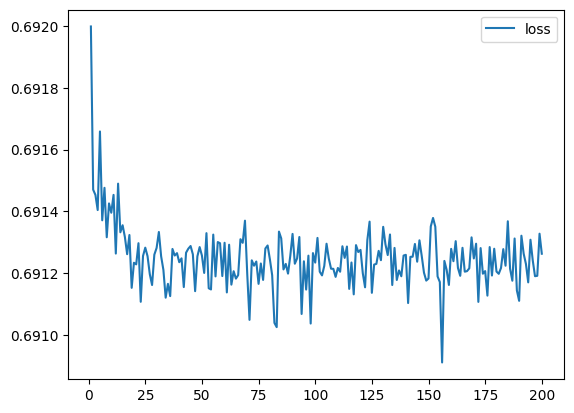

In [50]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model4.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()